In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
python = r"C:\Users\khush\Downloads\Expanded_data_with_more_features.csv\Expanded_data_with_more_features.csv"
print(python)

C:\Users\khush\Downloads\Expanded_data_with_more_features.csv\Expanded_data_with_more_features.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(python, na_values = ["", "NA"], keep_default_na = False)
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [5]:
df.shape

(30641, 15)

In [6]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

In [7]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [10]:
df.isna().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [11]:
def replacer(df):
    cat = list(df.columns[df.dtypes == "object"])

    for i in df.columns:
        if i in cat:
            mode = df[i].mode()[0]
            df[i] = df[i].fillna(mode)
        else:
            mean = df[i].mean()
            df[i] = df[i].fillna(mean)

In [12]:
replacer(df)

In [13]:
df.isna().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [14]:
cat = []
con = []

for j in df.columns:
    if df[j].dtypes == "object":
        cat.append(j)
    else:
        con.append(j)

In [15]:
cat

['Gender',
 'EthnicGroup',
 'ParentEduc',
 'LunchType',
 'TestPrep',
 'ParentMaritalStatus',
 'PracticeSport',
 'IsFirstChild',
 'TransportMeans',
 'WklyStudyHours']

In [16]:
con

['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']

In [17]:
df.dtypes

Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object

In [18]:
df[cat].describe()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,TransportMeans,WklyStudyHours
count,30641,30641,30641,30641,30641,30641,30641,30641,30641,30641
unique,2,5,6,2,2,4,3,2,2,3
top,female,group C,some college,standard,none,married,sometimes,yes,school_bus,5 - 10
freq,15424,11052,8478,19905,20686,18034,15844,19986,19279,17201


In [19]:
df[con].describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.420342,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


In [20]:
gender_scores = df.groupby("Gender")[["MathScore", "ReadingScore", "WritingScore"]].mean()
print(gender_scores)

        MathScore  ReadingScore  WritingScore
Gender                                       
female  64.080654     72.853216     72.856457
male    69.069856     65.854571     63.920418


In [21]:
parent_edu_scores = df.groupby("ParentEduc")[["MathScore", "ReadingScore", "WritingScore"]].mean()
print(parent_edu_scores)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.445978     69.189667     68.456711
some high school    62.584013     65.510785     63.632409


In [22]:
test_prep_scores = df.groupby("TestPrep")[["MathScore", "ReadingScore", "WritingScore"]].mean()
print(test_prep_scores)

           MathScore  ReadingScore  WritingScore
TestPrep                                        
completed  69.546660     73.732998     74.703265
none       65.120323     67.281495     65.394180


In [23]:
correlations = df[["NrSiblings", "MathScore", "ReadingScore", "WritingScore"]].corr()
print(correlations)

              NrSiblings  MathScore  ReadingScore  WritingScore
NrSiblings      1.000000  -0.001163     -0.000851     -0.002487
MathScore      -0.001163   1.000000      0.817825      0.807118
ReadingScore   -0.000851   0.817825      1.000000      0.952584
WritingScore   -0.002487   0.807118      0.952584      1.000000


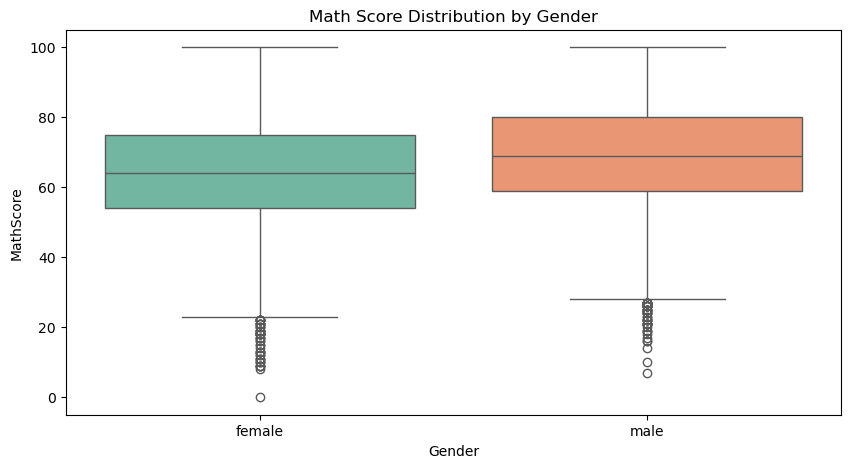

In [24]:
plt.figure(figsize = (10, 5))
sns.boxplot(data = df, x = "Gender", y = "MathScore", palette = "Set2")
plt.title("Math Score Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("MathScore")
plt.show()

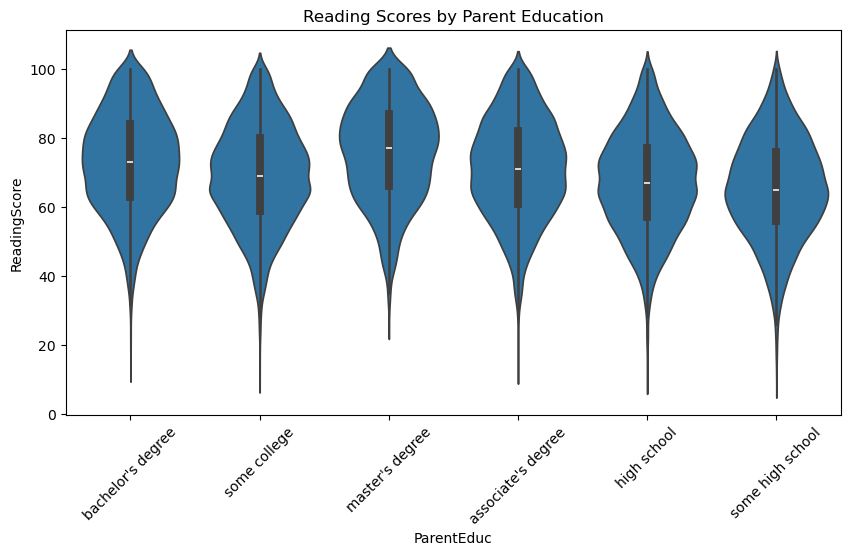

In [25]:
plt.figure(figsize = (10, 5))
sns.violinplot(data = df, x = "ParentEduc", y = "ReadingScore")
plt.xticks(rotation = 45)
plt.xlabel("ParentEduc")
plt.ylabel("ReadingScore")
plt.title("Reading Scores by Parent Education")
plt.show()

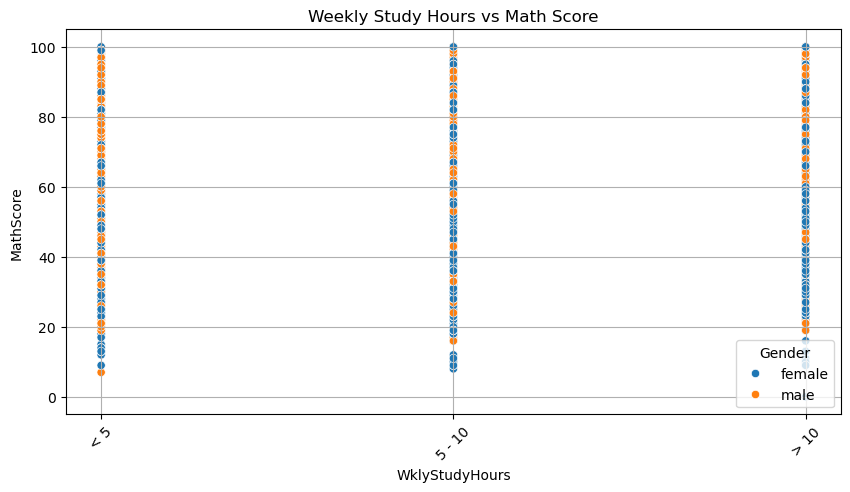

In [26]:
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = "WklyStudyHours", y = "MathScore", hue = "Gender")
plt.title("Weekly Study Hours vs Math Score")
plt.xlabel("WklyStudyHours")
plt.ylabel("MathScore")
plt.xticks(rotation = 45)
plt.grid()
plt.show()

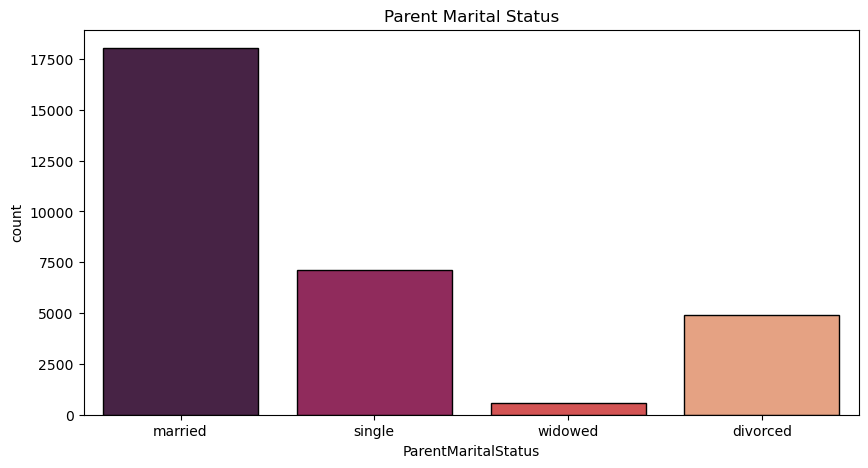

In [27]:
plt.figure(figsize = (10, 5))
sns.countplot(data = df, x = "ParentMaritalStatus", palette = "rocket", edgecolor = "black")
plt.title("Parent Marital Status")
plt.show()

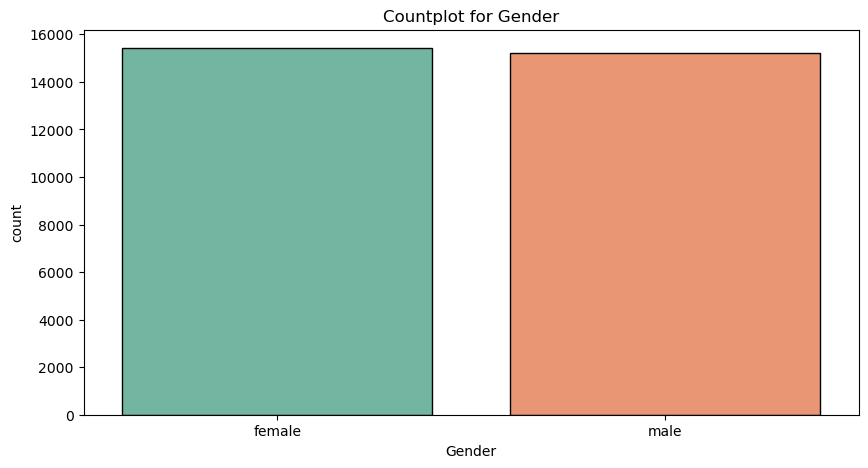

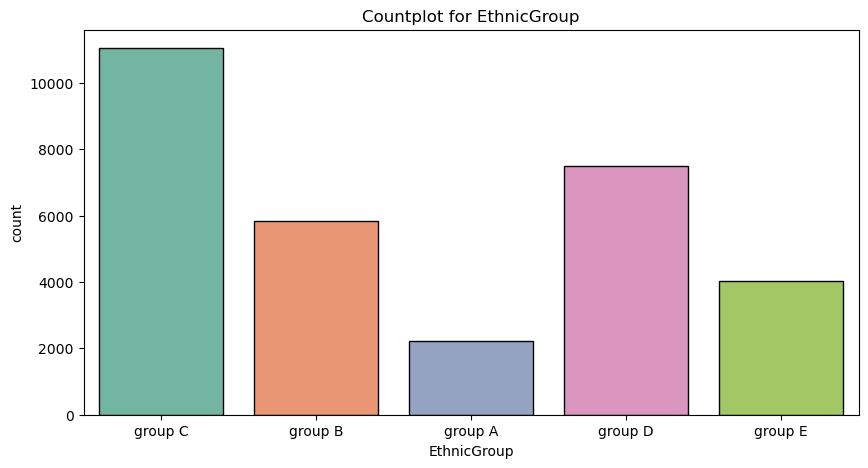

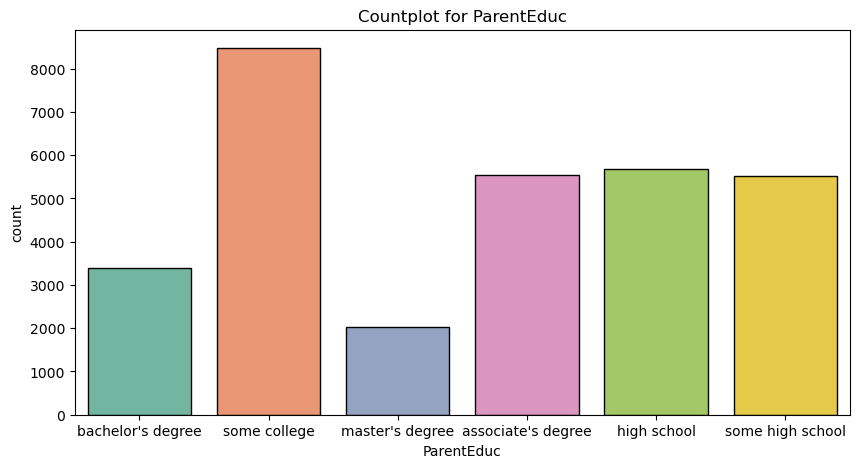

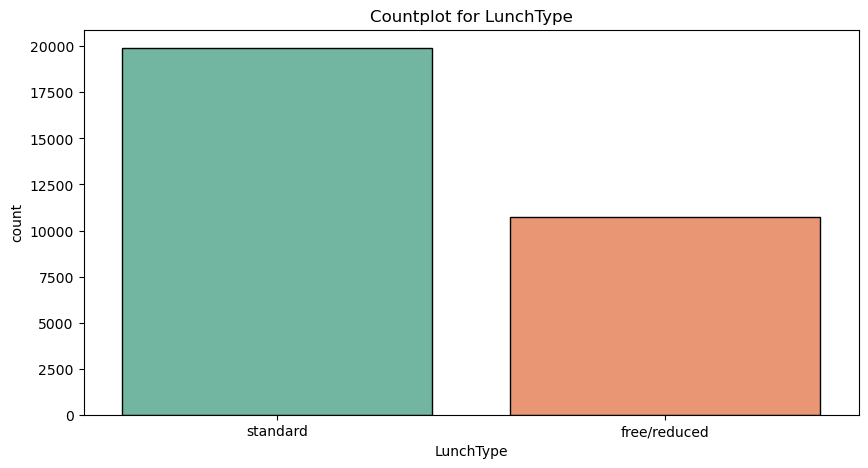

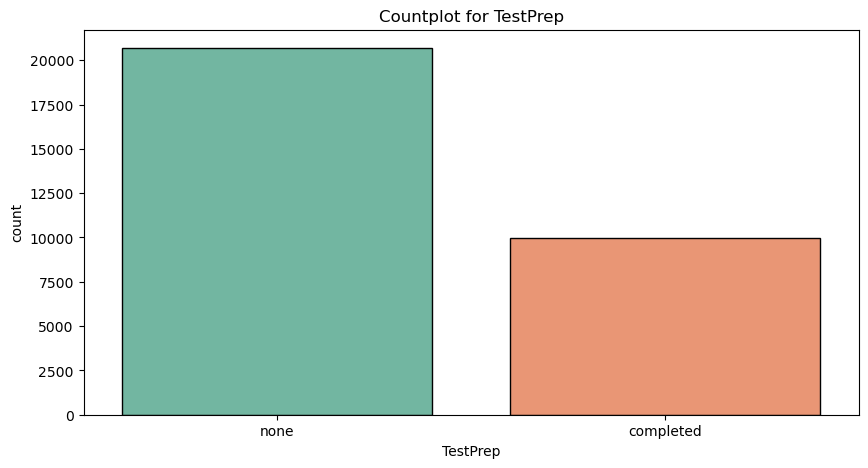

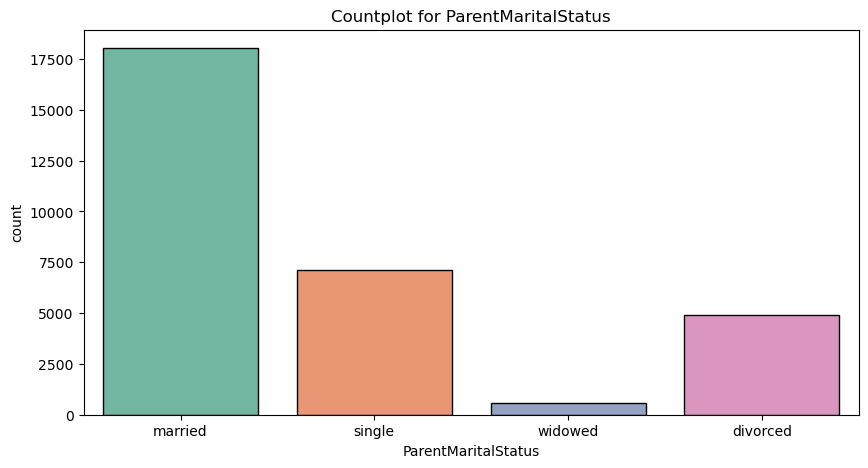

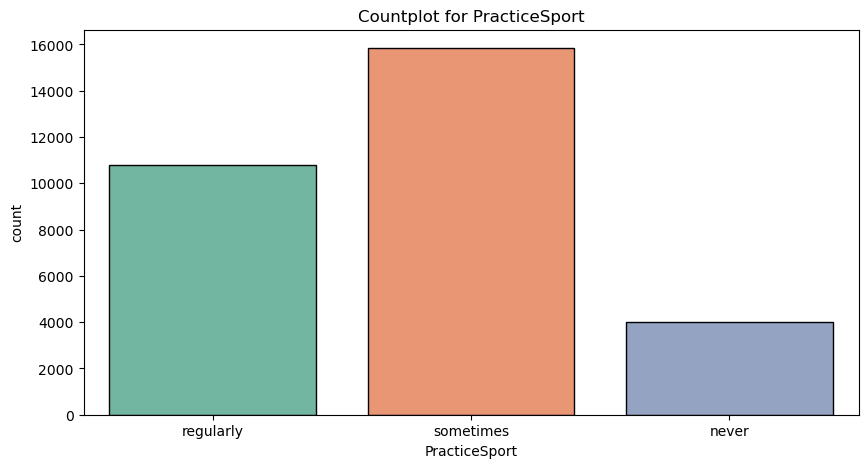

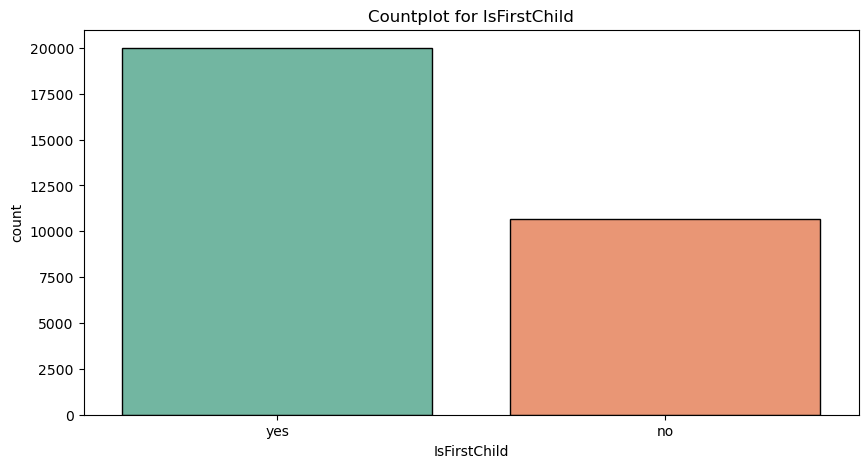

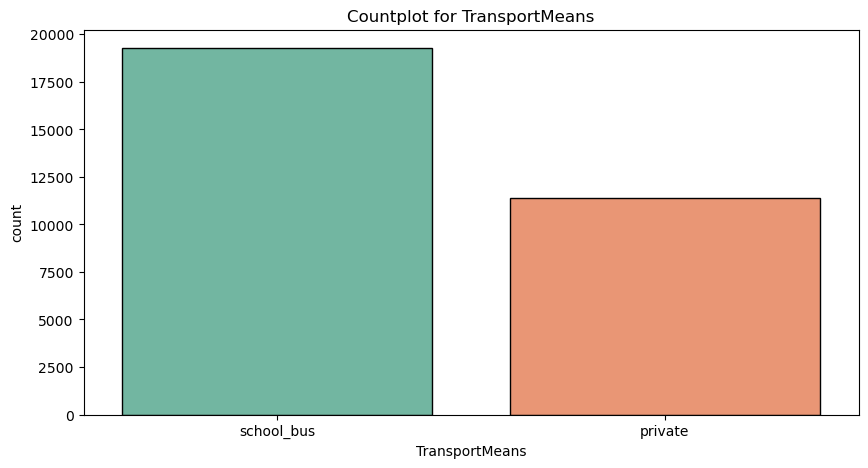

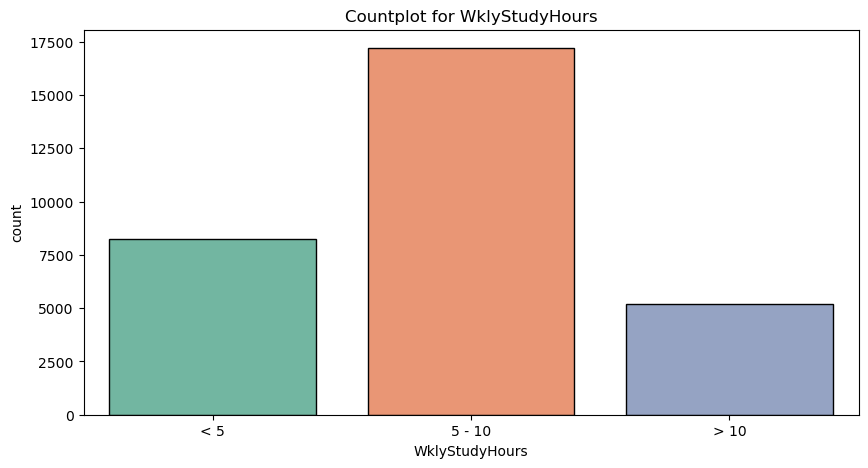

In [28]:
for i in cat:
    plt.figure(figsize = (10, 5))
    sns.countplot(data = df, x = i, palette = "Set2", edgecolor = "black")
    plt.title(f"Countplot for {i}")
    plt.show()

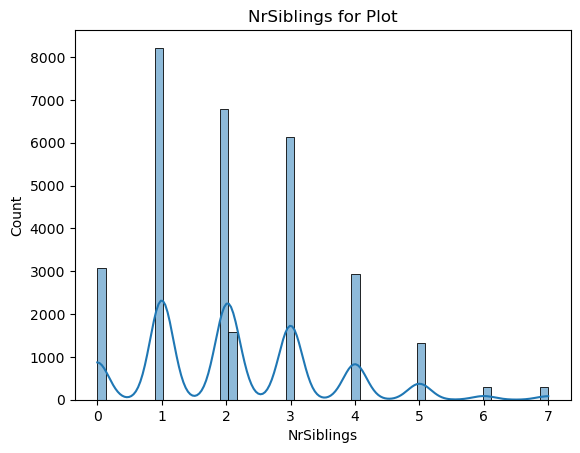

In [29]:
plt.figure(figure = (10, 5))
sns.histplot(data = df, x = "NrSiblings", kde = True, edgecolor = "black")
plt.title("NrSiblings for Plot")
plt.show()

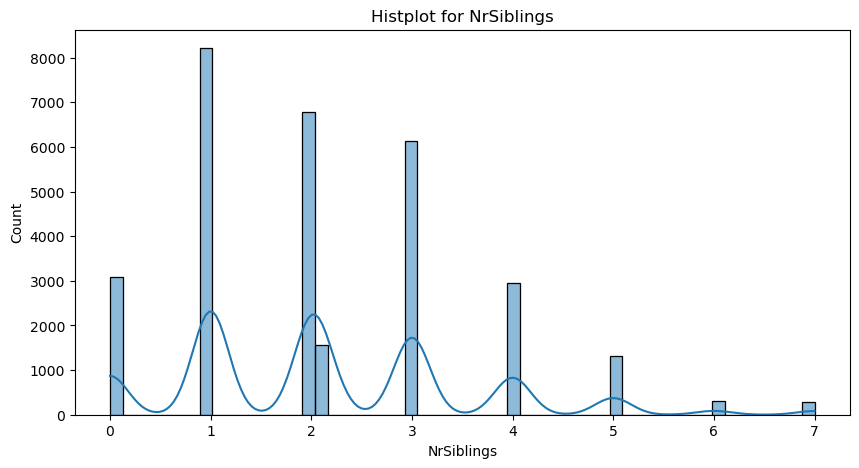

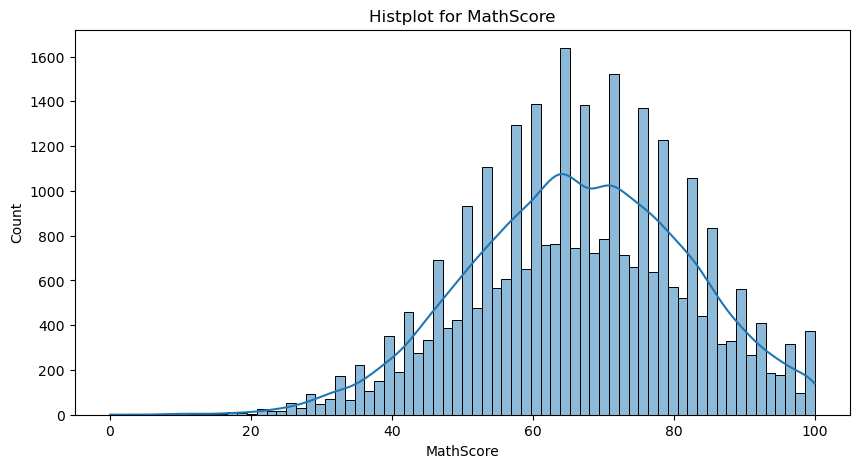

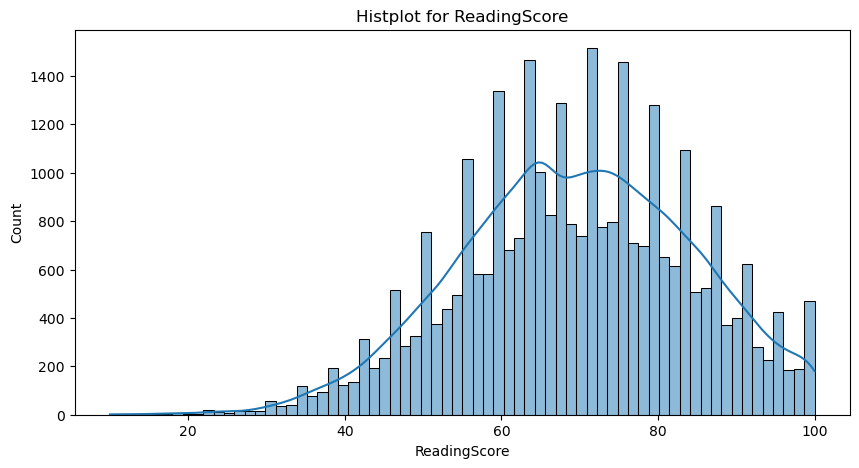

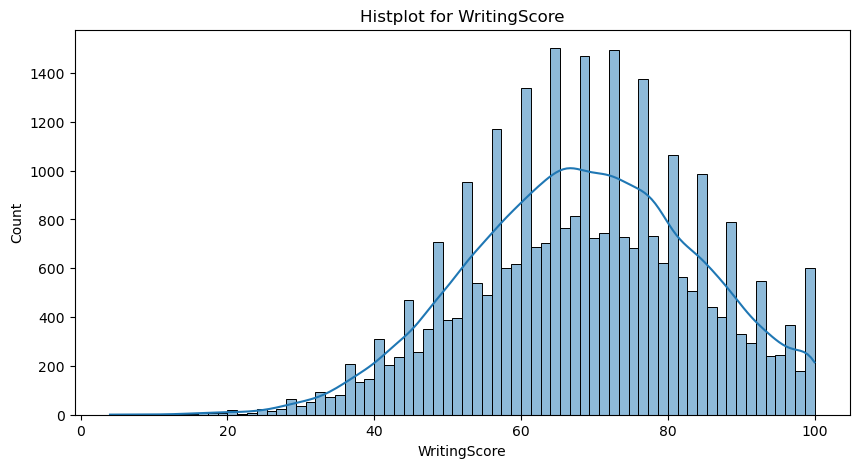

In [30]:
for j in con:
    plt.figure(figsize = (10, 5))
    sns.histplot(data = df, x = j, kde = True, edgecolor = "black")
    plt.title(f"Histplot for {j}")
    plt.show()

In [31]:
a = pd.crosstab(df["Gender"], df["ParentMaritalStatus"])
print(a)

ParentMaritalStatus  divorced  married  single  widowed
Gender                                                 
female                   2570     8925    3643      286
male                     2349     9109    3454      305


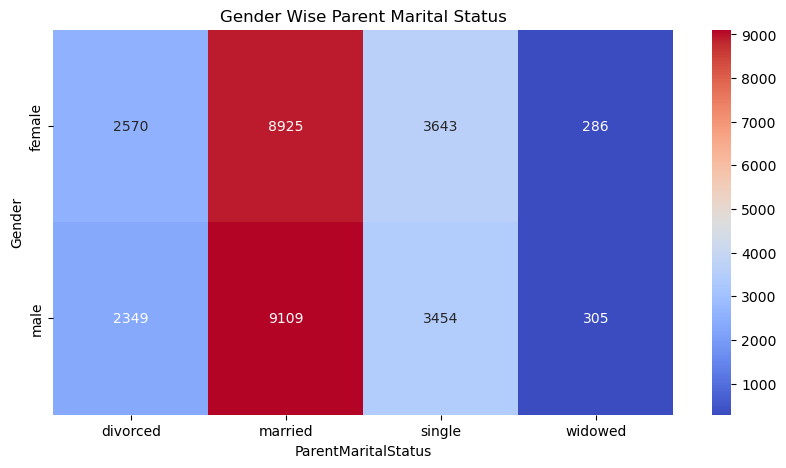

In [32]:
plt.figure(figsize = (10, 5))
sns.heatmap(data = a, annot = True, fmt = "d", cmap = "coolwarm")
plt.title("Gender Wise Parent Marital Status")
plt.xlabel("ParentMaritalStatus")
plt.ylabel("Gender")
plt.show()

In [33]:
b = pd.crosstab(df["ParentEduc"], df["WklyStudyHours"])
print(b)

WklyStudyHours      5 - 10   < 5  > 10
ParentEduc                            
associate's degree    3146  1459   945
bachelor's degree     1907   922   557
high school           3274  1479   934
master's degree       1073   588   362
some college          4768  2288  1422
some high school      3033  1502   982


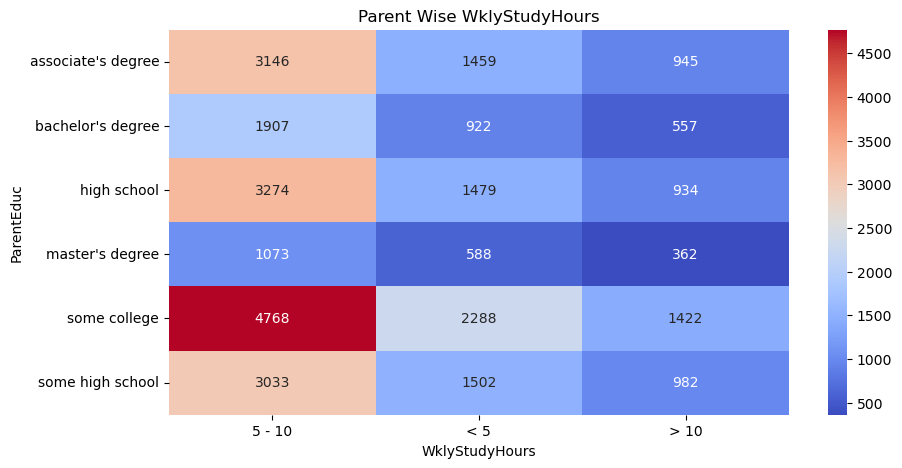

In [34]:
plt.figure(figsize = (10, 5))
sns.heatmap(data = b, annot = True, fmt = "d", cmap = "coolwarm")
plt.title("Parent Wise WklyStudyHours")
plt.xlabel("WklyStudyHours")
plt.ylabel("ParentEduc")
plt.show()

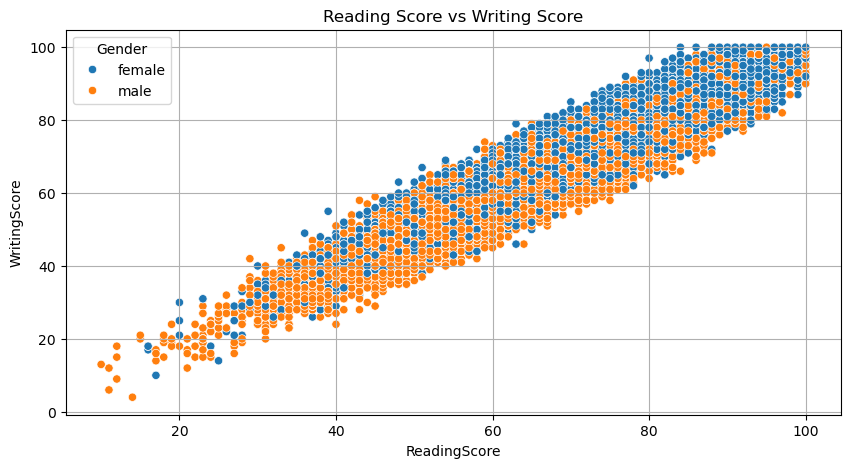

In [35]:
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = "ReadingScore", y = "WritingScore", hue = "Gender")
plt.title("Reading Score vs Writing Score")
plt.xlabel("ReadingScore")
plt.ylabel("WritingScore")
plt.grid()
plt.show()

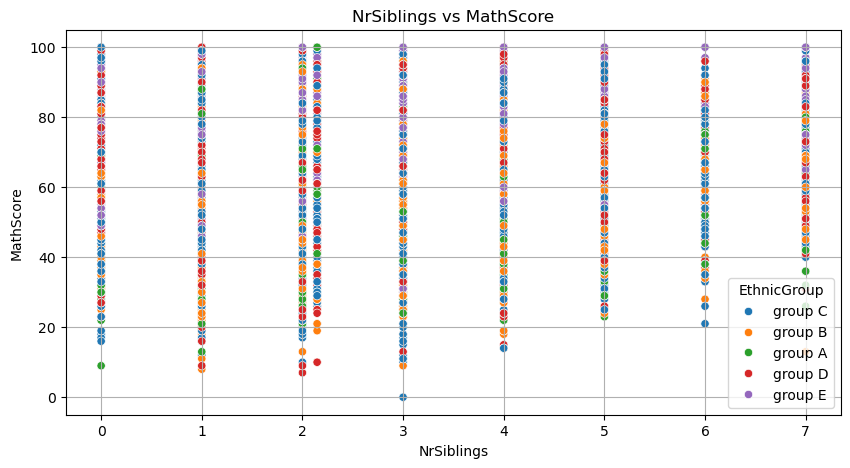

In [36]:
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = "NrSiblings", y = "MathScore", hue = "EthnicGroup")
plt.title("NrSiblings vs MathScore")
plt.xlabel("NrSiblings")
plt.ylabel("MathScore")
plt.grid()
plt.show()

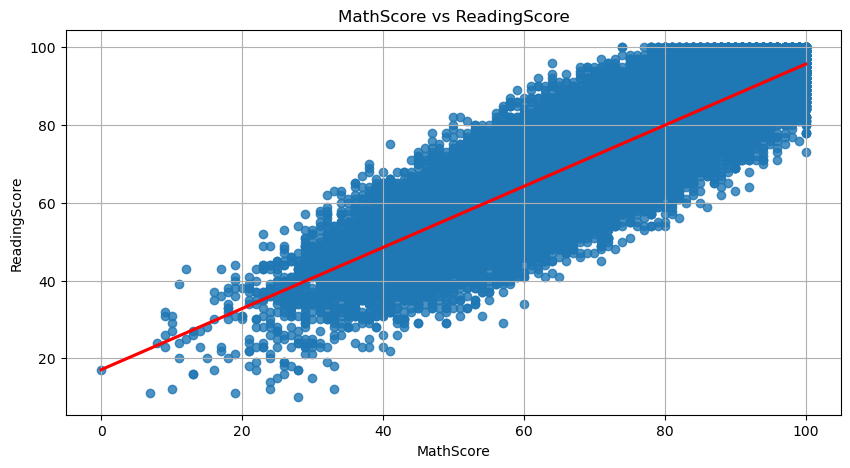

In [37]:
plt.figure(figsize = (10, 5))
sns.regplot(data = df, x = "MathScore", y = "ReadingScore", line_kws = {"color":"red"})
plt.title("MathScore vs ReadingScore")
plt.xlabel("MathScore")
plt.ylabel("ReadingScore")
plt.grid()
plt.show()

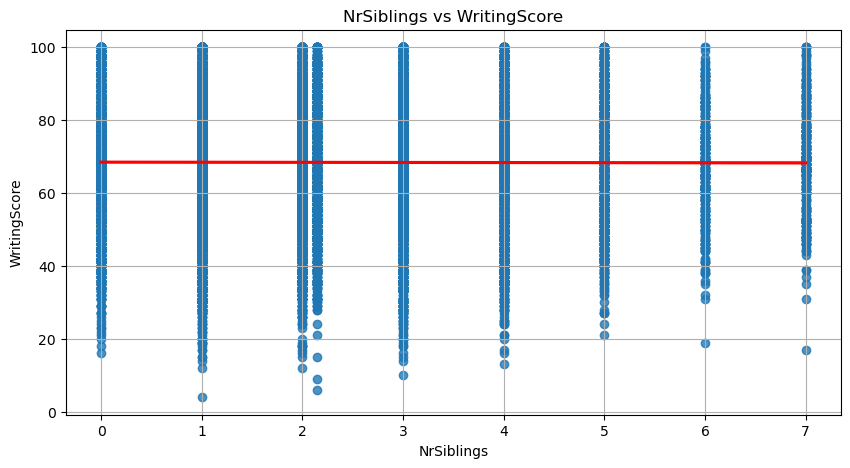

In [38]:
plt.figure(figsize = (10, 5))
sns.regplot(data = df, x = "NrSiblings", y = "WritingScore", line_kws = {"color":"red"})
plt.title("NrSiblings vs WritingScore")
plt.xlabel("NrSiblings")
plt.ylabel("WritingScore")
plt.grid()
plt.show()

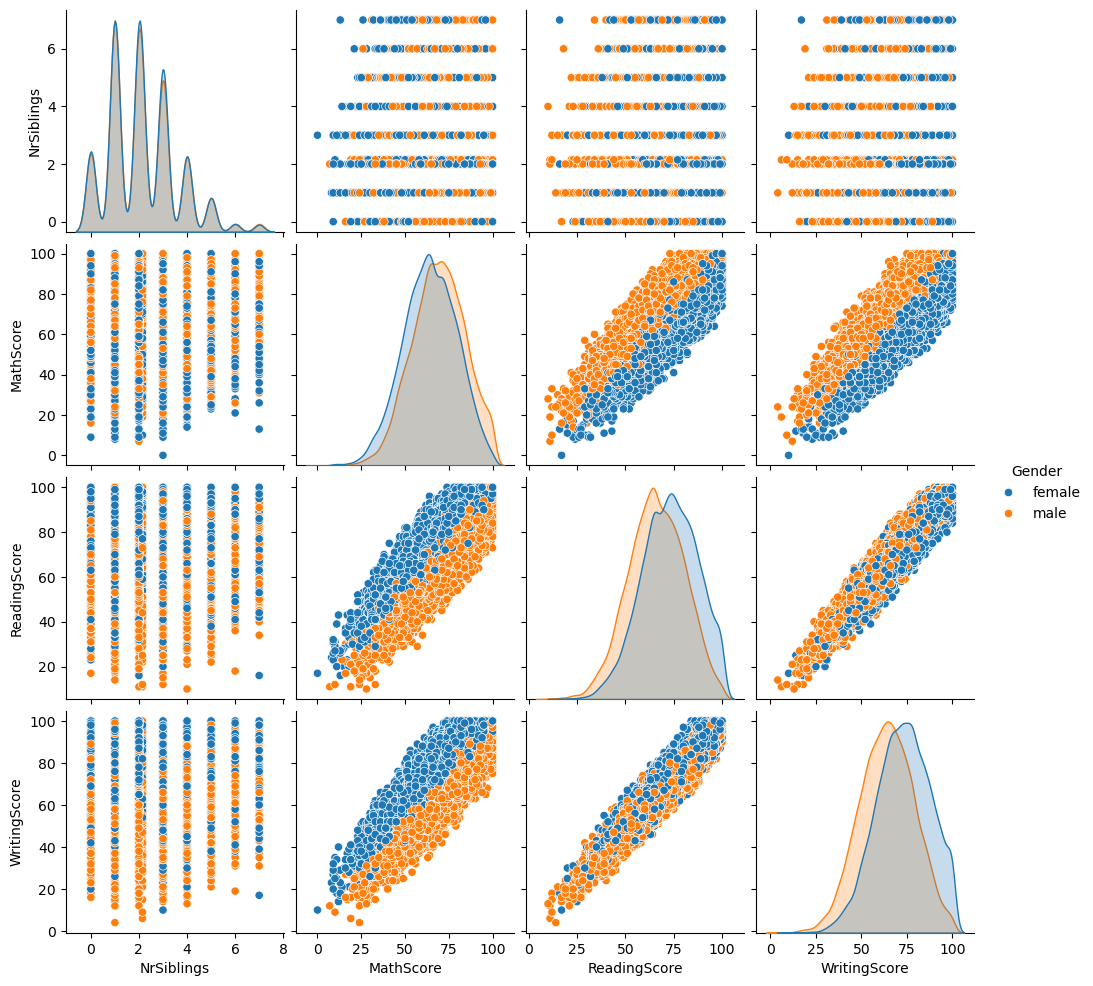

In [39]:
sns.pairplot(data = df, hue = "Gender")
plt.show()

In [40]:
c = df.groupby(by = "ParentMaritalStatus") \
    .agg({"MathScore":"mean"}) \
    .sort_values(by = "MathScore")
c

,MathScore
ParentMaritalStatus,
single,66.165704
married,66.650161
divorced,66.691197
widowed,67.368866


<Figure size 1000x500 with 0 Axes>

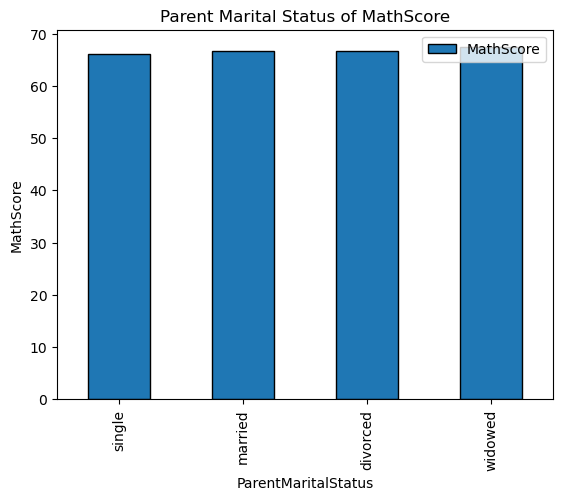

In [41]:
plt.figure(figsize = (10, 5))
c.plot(kind = "bar", edgecolor = "black")
plt.title("Parent Marital Status of MathScore")
plt.xlabel("ParentMaritalStatus")
plt.ylabel("MathScore")
plt.show()

In [42]:
d = df.corr(numeric_only = True)
print(d)

              NrSiblings  MathScore  ReadingScore  WritingScore
NrSiblings      1.000000  -0.001163     -0.000851     -0.002487
MathScore      -0.001163   1.000000      0.817825      0.807118
ReadingScore   -0.000851   0.817825      1.000000      0.952584
WritingScore   -0.002487   0.807118      0.952584      1.000000


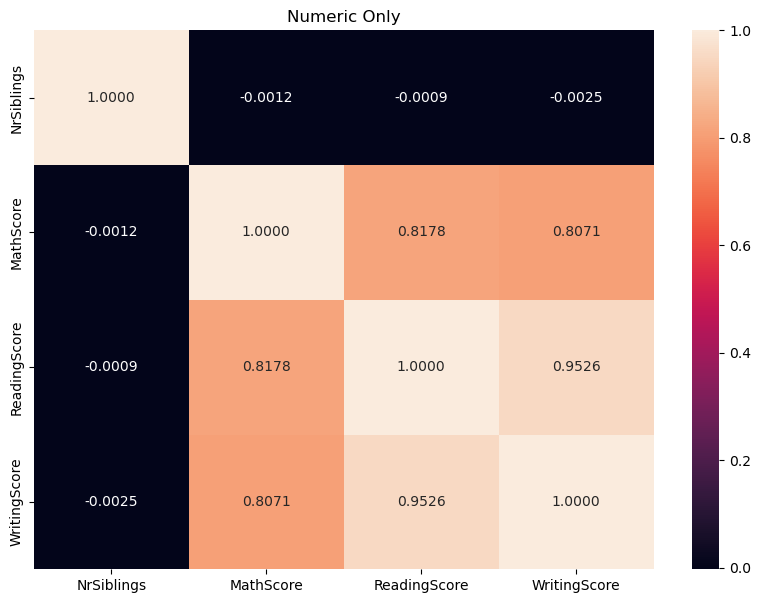

In [43]:
plt.figure(figsize = (10, 7))
sns.heatmap(data = d, annot = True, fmt = ".4f")
plt.title("Numeric Only")
plt.show()

In [44]:
e = pd.pivot_table(
    data = df,
    values = "MathScore",
    index = "ReadingScore",
    columns = "PracticeSport",
    aggfunc = "mean"
)
e

PracticeSport,never,regularly,sometimes
ReadingScore,,,
10,NaN,NaN,28.000000
11,19.000000,NaN,7.000000
12,21.500000,NaN,24.000000
14,24.000000,NaN,NaN
15,25.000000,NaN,30.000000
...,...,...,...
96,86.714286,89.903614,87.704082
97,86.925926,89.194030,88.922222
98,88.878788,91.905660,89.903846


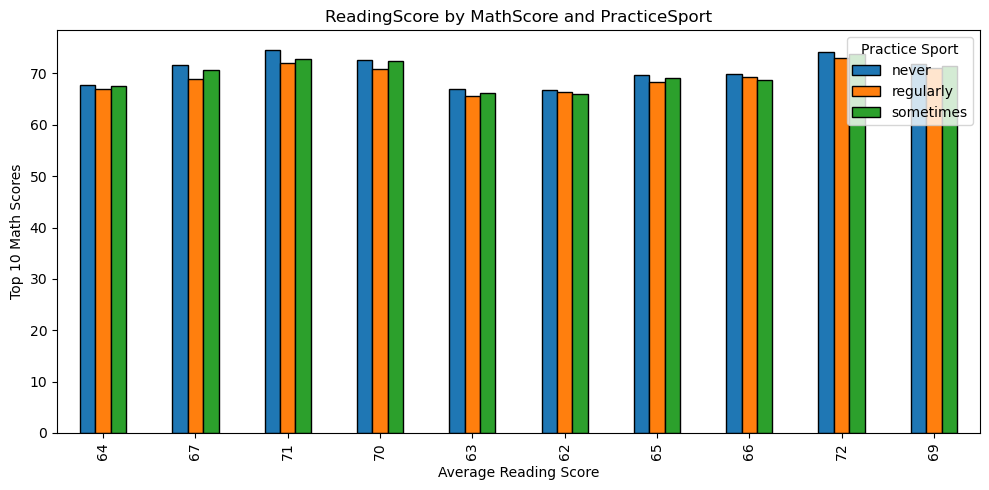

In [45]:
top_ten = df["MathScore"].value_counts().nlargest(10).index
filtered_df = df[df["MathScore"].isin(top_ten)]

pivot_filtered = pd.pivot_table(
    data = filtered_df,
    values = "ReadingScore",
    index = "MathScore",
    columns = "PracticeSport",
    aggfunc = "mean"
)

pivot_filtered.loc[top_ten].plot(kind = "bar", figsize = (10, 5), edgecolor = "black")
plt.title("ReadingScore by MathScore and PracticeSport")
plt.xlabel("Average Reading Score")
plt.ylabel("Top 10 Math Scores")
plt.legend(title = "Practice Sport")
plt.tight_layout()
plt.show()

In [46]:
f = pd.pivot_table(
    data = df,
    values = "NrSiblings",
    index = "Gender",
    columns = "ParentMaritalStatus",
    aggfunc = "mean"
)
f

ParentMaritalStatus,divorced,married,single,widowed
Gender,,,,
female,2.170026,2.152029,2.127405,2.008162
male,2.162279,2.131828,2.154932,2.304579


<Figure size 1000x500 with 0 Axes>

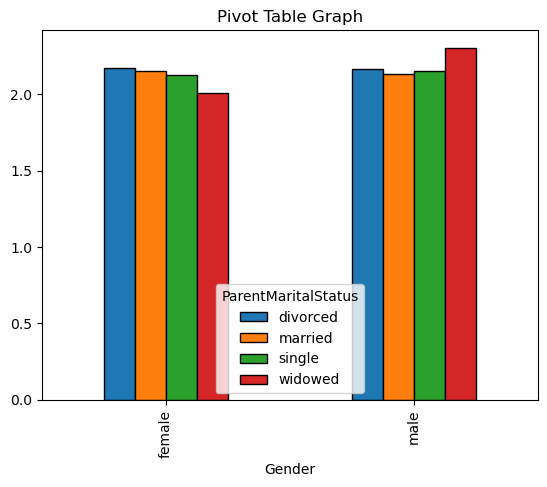

In [47]:
plt.figure(figsize = (10, 5))
f.plot(kind = "bar",edgecolor = "black")
plt.title("Pivot Table Graph")
plt.show()

In [48]:
import os 
a = r"C:\Users\khush\Student Result Analysis Project"
os.chdir(a)

In [49]:
df.to_csv("Student Result Analysis Cleaned Dataset.csv", index = False)

In [50]:
%pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [51]:
from ydata_profiling import ProfileReport

In [52]:
profile = ProfileReport(df, title = "Student Result Analysis Project Report")

In [53]:
import os
b = r"C:\Users\khush\Student Result Analysis Project"
os.chdir(b)

In [54]:
profile.to_file("Student Result Analysis Project Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]